In [1]:
from qiskit import *
import matplotlib.pyplot as plt

In [2]:

def add(a,b,plot=0):
    n=len(a)
    q1=QuantumRegister(n,"q1")
    q2=QuantumRegister(n,"q2")
    cin=QuantumRegister(1,"cin")

    out=QuantumRegister(n,"out")
    cout=QuantumRegister(n,"cout")
    classic_bits = ClassicalRegister(n+1,"classical")
    qc=QuantumCircuit(q1,q2,cin,out,cout,classic_bits)
    def set_q(qc,q1,a):
        a=a[::-1]
        for i,j in enumerate(a):
            if int(j)==1:
                qc.x(q1[i])
    set_q(qc,q1,a)
    set_q(qc,q2,b)
    def make_sum(qc,q1,q2,cin,out,cout):
        qc.cx(q1,out)
        qc.cx(q2,out)
        qc.cx(cin,out)
        qc.ccx(q1,q2,cout)
        qc.ccx(q1,cin,cout)
        qc.ccx(q2,cin,cout)
    for i in range(n):
        if i==0:
            make_sum(qc,q1[0],q2[0],cin,out[0],cout[0])
        else:
            make_sum(qc,q1[i],q2[i],cout[i-1],out[i],cout[i])
    for i in range(n):
        qc.measure(out[i],classic_bits[i])
    qc.measure(cout[-1],classic_bits[-1])
    if plot:
        fig,ax=plt.subplots(figsize=(5,5))
        qc.draw("mpl",ax=ax,scale=0.5)
        plt.tight_layout()
        plt.savefig("add.png",dpi=300)
    return qc

{'000': 1024}


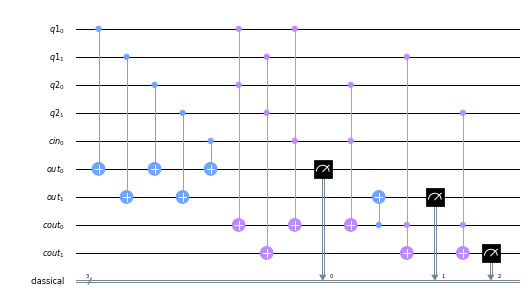

In [3]:
a="00"
b="00"

qc=add(a,b,plot=1)
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

In [4]:
!open .